<a href="https://colab.research.google.com/github/davidrtorres/Deep_Learning/blob/main/Gabor_Features_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Using Gabor Filters to Generate Features for Machine Learning 
In this notebook I will be working with an image and Gabor filters in Python.  A Gabor filter is a convolutional filter.  Gabor filters are used in Image Processing and Computer Vision.  Gabor filters can be used for texture analysis, edge detection and feature extraction.  A Gabor kernal is a band pass filter and we are defining various parameters.  A band pass filter means they allow a certain band of frequencies and reject other types.  Gabor filters have various parameters you can change to generate various responses from an image.<br>  
In this notebook I will show how by changing the Gabor parameters (sigma, theta, lamda, phi) you can generates lots of responses from the input image(s).  Then add the responses to a Pandas dataframe to be used as inputs for a machine learning algorithm for training purposes.  

I followed the Youtube video /content/drive/MyDrive/datasets/synthetic.JPG .

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### Load the Image

In [2]:
img = cv2.imread('/content/drive/MyDrive/datasets/synthetic.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
from google.colab.patches import cv2_imshow

### Gabor Filters
I will be adjusting the Gabor filter parameters to generate alot of filters/responses.  How you set parameters depends on what you're trying to extract.  Gabor is a function of the following parameters:<br>
ksize - size of the returned filter. Pick a size that makes sense to the image and feature size.<br>
sigma - Standard deviation of the gausian envelope. Large sigma number on small features may mean you miss small features. <br>
theta - Orientation of the normal to the parallel stripes of a Gabor function.<br>
lamda - Wavelength of the sinusoidal factor<br>
gamma -Spatial aspect ratio<br>
phi - Phase offset<br>
ktype- once kernal is generated what kind of kernel values do we want. 32F indicates type and range of values (float32). <br>
<br>


This is the image of the kernal that was generated.

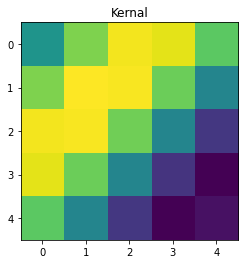

In [4]:
ksize=5
sigma =5
theta= 1* np.pi/4
lamda = 1* np.pi/4
gamma = 0.9
phi =1

#defien Gabor kernal. Function w/parameters kernal size, sigma
kernal = cv2.getGaborKernel((ksize,ksize),sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
plt.title('Kernal')
plt.imshow(kernal)


The convolutional kernal will be applied to every pixel in the image. ksize is 50.

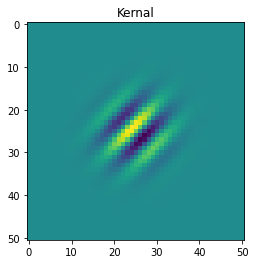

In [5]:
ksize=50
sigma =5
theta= 1* np.pi/4
lamda = 1* np.pi/4
gamma = 0.9
phi =1

#defien Gabor kernal. Function w/parameters kernal size, sigma
kernal = cv2.getGaborKernel((ksize,ksize),sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
plt.title('Kernal')
plt.imshow(kernal)

Changed sigma to 30.

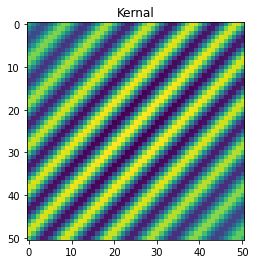

In [6]:
ksize=50
sigma =30
theta= 1* np.pi/4
lamda = 1* np.pi/4
gamma = 0.5
phi =1

kernal = cv2.getGaborKernel((ksize,ksize),sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
plt.title('Kernal')
plt.imshow(kernal)

With np.pi/2 it's horizontal. 

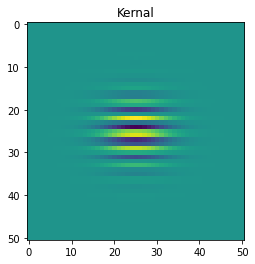

In [7]:
ksize=50
sigma =5
theta= 1* np.pi/2
lamda = 1* np.pi/4
gamma = 0.9
phi =1

kernal = cv2.getGaborKernel((ksize,ksize),sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
plt.title('Kernal')
plt.imshow(kernal)

Sigma =30 results in horizontal lines.  If you're looking for features that are horizontal then by applying the horizontal filter you're passing the horizontal filters through and blocking everything that's vetical. 

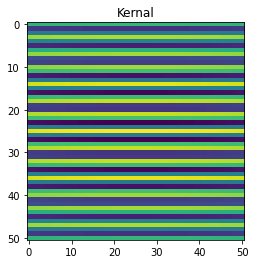

In [8]:
ksize=50
sigma =30
theta= 1* np.pi/2
lamda = 1* np.pi/4
gamma = 0.5
phi =0

#defien Gabor kernal. Function w/parameters kernal size, sigma
kernal = cv2.getGaborKernel((ksize,ksize),sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
plt.title('Kernal')
plt.imshow(kernal)

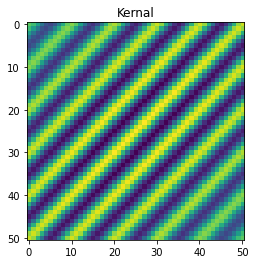

In [9]:
ksize=50
sigma =30
theta= 1* np.pi/4
lamda = 1* np.pi/4
gamma = 0.5
phi =0

#defien Gabor kernal. Function w/parameters kernal size, sigma
kernal = cv2.getGaborKernel((ksize,ksize),sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
plt.title('Kernal')
plt.imshow(kernal)

np.pi/1 it's all vertical.

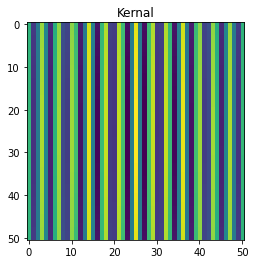

In [10]:
ksize=50
sigma =30
theta= 1* np.pi/1
lamda = 1* np.pi/4
gamma = 0.5
phi =0

#defien Gabor kernal. Function w/parameters kernal size, sigma
kernal = cv2.getGaborKernel((ksize,ksize),sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
plt.title('Kernal')
plt.imshow(kernal)

theta, np.pi/4 gives a wave length.

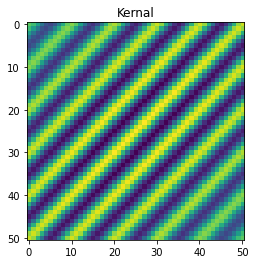

In [11]:
ksize=50
sigma =30
theta= 1* np.pi/4
lamda = 1* np.pi/4
gamma = 0.5
phi =0

#defien Gabor kernal. Function w/parameters kernal size, sigma
kernal = cv2.getGaborKernel((ksize,ksize),sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
plt.title('Kernal')
plt.imshow(kernal)

Increase lamda to 16 and change wave length. 

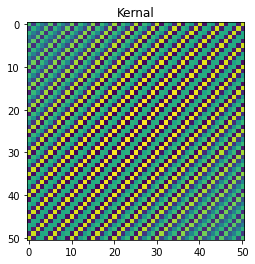

In [12]:
ksize=50
sigma =30
theta= 1* np.pi/4
lamda = 1* np.pi/16
gamma = 0.5
phi =0

#defien Gabor kernal. Function w/parameters kernal size, sigma
kernal = cv2.getGaborKernel((ksize,ksize),sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
plt.title('Kernal')
plt.imshow(kernal)

Changed gamma to 1 that means x**2 + y**2 which defines a circle so aspect ratio reflects a circular kernal.

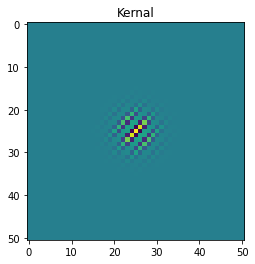

In [13]:
ksize=50
sigma =3
theta= 1* np.pi/4
lamda = 1* np.pi/16
gamma = 1
phi =0

#defien Gabor kernal. Function w/parameters kernal size, sigma
kernal = cv2.getGaborKernel((ksize,ksize),sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
plt.title('Kernal')
plt.imshow(kernal)

Change gamma to .01 it's more elongated.

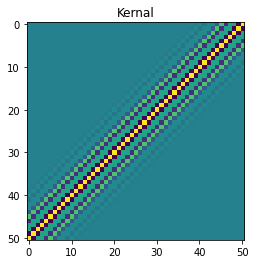

In [14]:
ksize=50
sigma =3
theta= 1* np.pi/4
lamda = 1* np.pi/16
gamma = .01
phi =0

#defien Gabor kernal. Function w/parameters kernal size, sigma
kernal = cv2.getGaborKernel((ksize,ksize),sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
plt.title('Kernal')
plt.imshow(kernal)

### How Does the Filter Impact and Image

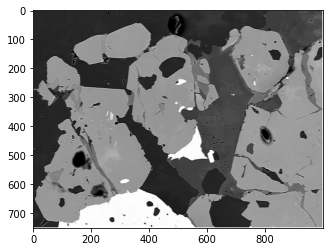

In [15]:
path = '/content/drive/MyDrive/datasets/BSE_Image.jpg'
#cv2_imshow('img')

img2 = cv2.imread(path)
plt.imshow(img2);

Apply the kernal to image. 

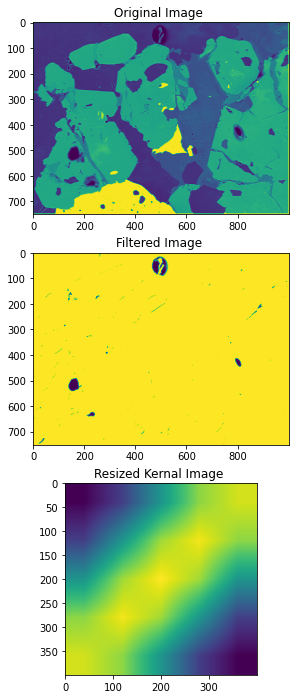

In [16]:
path = '/content/drive/MyDrive/datasets/BSE_Image.jpg'

ksize=5
sigma =3
theta= 1* np.pi/4
lamda = 1* np.pi/4
gamma = 0.5
phi =0

#defien Gabor kernal. Function w/parameters kernal size, sigma
kernal = cv2.getGaborKernel((ksize,ksize),sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

img = cv2.imread(path)
#convert image to gray
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#apply filter
fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernal)
kernal_resize = cv2.resize(kernal, (400,400))
# cv2_imshow(img2)
# cv2_imshow(fimg)
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.title("Original Image ")
plt.imshow(img2)

plt.subplot(3,1,2)
plt.imshow(fimg)
plt.title("Filtered Image ");


plt.subplot(3,1,3)
plt.imshow(kernal_resize)
plt.title("Resized Kernal Image ");



# plt.imshow(img2)
# plt.imshow(fimg)
# plt.imshow(kernal_resize)

theta is 4. We. should only see the lines that are 45 degrees.  There are lines going in both directions in the original picture I am only pulling the horizontal lines that are aligned along with the Gabor kernal.  All the other lines in the image are suppressed.  This is a band pass filter. It's only passing the things that it let's through and any other lines that go in another direction are blocked.  The horizontal lines are gone and the vertical lines are gone.  

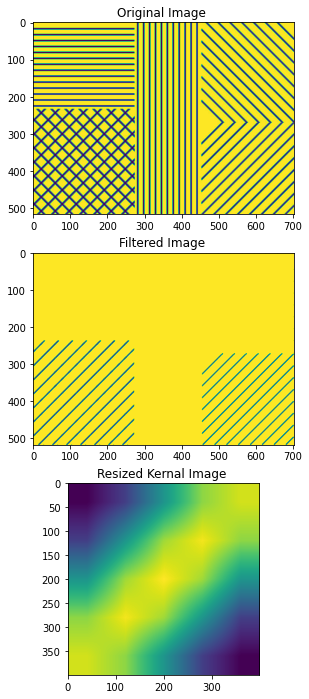

In [17]:
path = '/content/drive/MyDrive/datasets/synthetic.JPG'

ksize=5
sigma =3
theta= 1* np.pi/4 #45 degress
lamda = 1* np.pi/4
gamma = 0.5
phi =0

#defien Gabor kernal. Function w/parameters kernal size, sigma
kernal = cv2.getGaborKernel((ksize,ksize),sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

img = cv2.imread(path)
#convert image to gray
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#apply filter
fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernal)
kernal_resize = cv2.resize(kernal, (400,400))
# cv2_imshow(img2)
# cv2_imshow(fimg)
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.title("Original Image ")
plt.imshow(img2)

plt.subplot(3,1,2)
plt.imshow(fimg)
plt.title("Filtered Image ");


plt.subplot(3,1,3)
plt.imshow(kernal_resize)
plt.title("Resized Kernal Image ");


Changed pixel size to 50.  Won't do a good job because pixel sizes are too small.  See alot of artifacts in upper right corner.

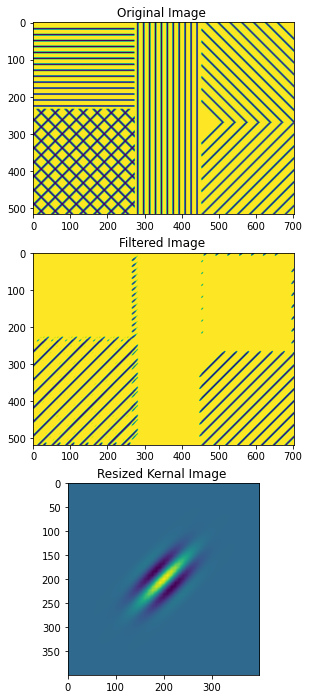

In [18]:
path = '/content/drive/MyDrive/datasets/synthetic.JPG'

ksize=50
sigma =3
theta= 1* np.pi/4 #45 degress
lamda = 1* np.pi/4
gamma = 0.5
phi =0

#defien Gabor kernal. Function w/parameters kernal size, sigma
kernal = cv2.getGaborKernel((ksize,ksize),sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

img = cv2.imread(path)
#convert image to gray
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#apply filter
fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernal)
kernal_resize = cv2.resize(kernal, (400,400))
# cv2_imshow(img2)
# cv2_imshow(fimg)
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.title("Original Image ")
plt.imshow(img2)

plt.subplot(3,1,2)
plt.imshow(fimg)
plt.title("Filtered Image ");


plt.subplot(3,1,3)
plt.imshow(kernal_resize)
plt.title("Resized Kernal Image ");


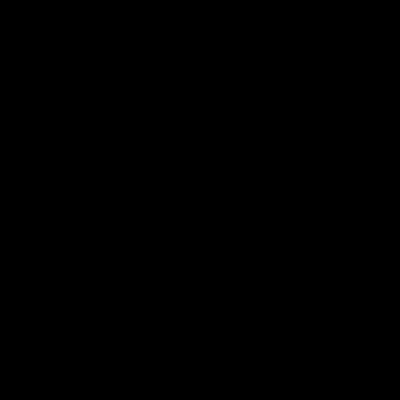

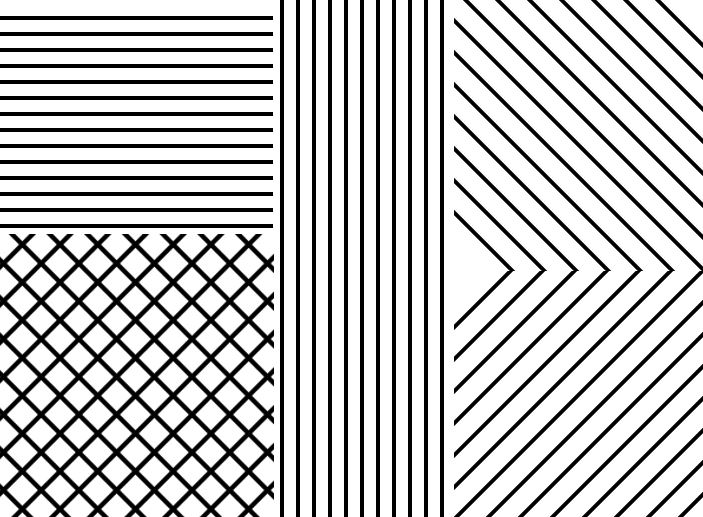

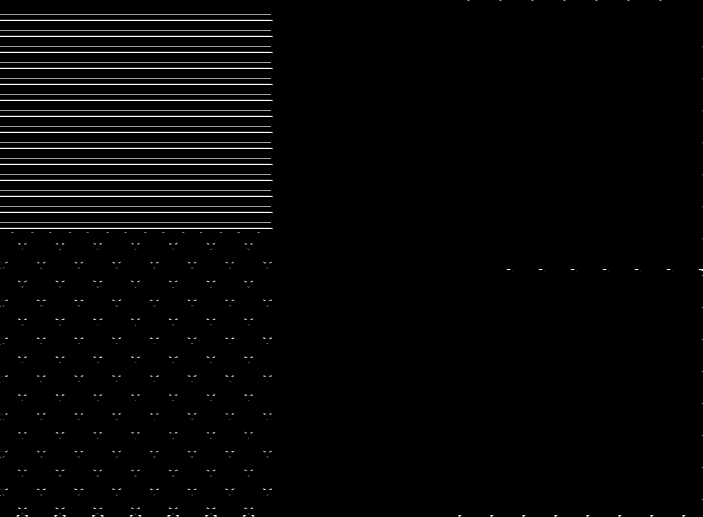

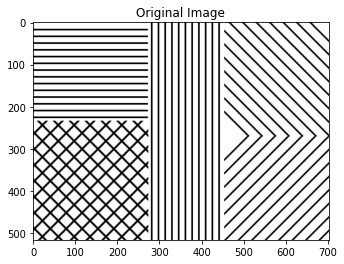

In [19]:
ksize=5
sigma =5
theta= 1* np.pi/2
lamda = 1* np.pi/4
gamma = 0.9
phi =1

#defien Gabor kernal. Function w/parameters kernal size, sigma
kernal = cv2.getGaborKernel((ksize,ksize),sigma, theta, lamda, gamma, phi)
# plt.title('Kernal')
# plt.imshow(kernal)
img = cv2.imread('/content/drive/MyDrive/datasets/synthetic.JPG')
plt.imshow(img,cmap='gray')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#optional for ease, changing image to gray level
#applying filter to image
fimg = cv2.filter2D(img,cv2.CV_8UC3, kernal)
#rezied the kernal from 5 x5 which is too small to see so resize to 400 x 400
kernal_resized = cv2.resize(kernal, (400,400))
cv2_imshow(kernal_resized)
plt.title('Original Image')
cv2_imshow(img)
cv2_imshow(fimg)
cv2.waitKey()
cv2.destroyAllWindows()

### Generate a Filter Bank and Add Responses to DataFrame
When adding pixels to dataframe need a 1D array because it will be a feature.  After adding the pixel values to dataframe my dataframe consists of 363451 rows and 1 feature.  Next I want to add additional columns corresponding to each Gabor response.  In order to do this we need to put parameters in for loop.<br>
For each of the unique combinations of theta, sigm, lamda and gamma I want to generate a kernal.  A kernal is a filter.  Once the kernal is generated I apply the kernal to the original image. fimg is now the filtered image.  Then I add filtered image to dataframe.

In [20]:
ksize=5

df = pd.DataFrame()

#add pixel values of image
img2 = img.reshape(-1)
df["Original_Pixels"] = img2

num =1
for theta in range(2):
  theta = theta/ 4. * np.pi #pi/4 and get 2 values: 0, pi/4
  for sigma in (3,5): #2 values
    for lamda in np.arange(0, np.pi, np.pi/4.): #go form 0 to pi, step up pi/4
      #if gamma = to 1 the kenral is going to be spherical
      #if gamma = 0, means very high aspect ratio
      for gamma in (0.05, 0.5): 
          #print(theta, sigma, lamda, gamma)
          gabor_label = 'Gabor' + str(num)
          #define Gabor kernal. Function w/parameters kernal size, sigma. For the parameters generate a kenral
          kernal = cv2.getGaborKernel((ksize,ksize),sigma, theta, lamda, gamma, 0) #phi is the 0
          #filtered image
          fimg = cv2.filter2D(img,cv2.CV_8UC3, kernal)
          #filter image is 2D need to reshape
          filtered_img = fimg.reshape(-1) #it's now 1D column
          #gabor1, gabor 2 each time it goes through the loop
          df[gabor_label] = filtered_img
          print(gabor_label, ': theta', theta,': sigma=', sigma, ': lamda',lamda, ': gamma',gamma )
          #every time iterate through loop add 1
          num += 1 

          # kernal_resized = cv2.resize(kernal, (400,400))
          # cv2_imshow(kernal_resized)
          # plt.title('Original Image')
          # cv2_imshow(img)
          # cv2_imshow(fimg)
          # cv2.waitKey()
          # cv2.destroyAllWindows()

Gabor1 : theta 0.0 : sigma= 3 : lamda 0.0 : gamma 0.05
Gabor2 : theta 0.0 : sigma= 3 : lamda 0.0 : gamma 0.5
Gabor3 : theta 0.0 : sigma= 3 : lamda 0.7853981633974483 : gamma 0.05
Gabor4 : theta 0.0 : sigma= 3 : lamda 0.7853981633974483 : gamma 0.5
Gabor5 : theta 0.0 : sigma= 3 : lamda 1.5707963267948966 : gamma 0.05
Gabor6 : theta 0.0 : sigma= 3 : lamda 1.5707963267948966 : gamma 0.5
Gabor7 : theta 0.0 : sigma= 3 : lamda 2.356194490192345 : gamma 0.05
Gabor8 : theta 0.0 : sigma= 3 : lamda 2.356194490192345 : gamma 0.5
Gabor9 : theta 0.0 : sigma= 5 : lamda 0.0 : gamma 0.05
Gabor10 : theta 0.0 : sigma= 5 : lamda 0.0 : gamma 0.5
Gabor11 : theta 0.0 : sigma= 5 : lamda 0.7853981633974483 : gamma 0.05
Gabor12 : theta 0.0 : sigma= 5 : lamda 0.7853981633974483 : gamma 0.5
Gabor13 : theta 0.0 : sigma= 5 : lamda 1.5707963267948966 : gamma 0.05
Gabor14 : theta 0.0 : sigma= 5 : lamda 1.5707963267948966 : gamma 0.5
Gabor15 : theta 0.0 : sigma= 5 : lamda 2.356194490192345 : gamma 0.05
Gabor16 : thet

In [21]:
df.head()

,Original_Pixels,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor23,Gabor24,Gabor25,Gabor26,Gabor27,Gabor28,Gabor29,Gabor30,Gabor31,Gabor32
0,255,0,0,0,0,0,0,255,255,0,...,255,255,0,0,255,255,130,122,255,255
1,255,0,0,0,0,0,0,255,255,0,...,255,255,0,0,255,255,130,122,255,255
2,255,0,0,0,0,0,0,255,255,0,...,255,255,0,0,255,255,130,122,255,255
3,255,0,0,0,0,0,0,255,255,0,...,255,255,0,0,255,255,130,122,255,255
4,255,0,0,0,0,0,0,255,255,0,...,255,255,0,0,255,255,130,122,255,255


In [22]:
df.shape

(363451, 33)

In [23]:
img = cv2.imread('/content/drive/MyDrive/datasets/synthetic.JPG')

df = pd.DataFrame()

#add pixel values of image
img2 = img.reshape(-1)
df["Original_Pixels"] = img2

num =1
kernals=[]
for theta in range(4):
  theta = theta/ 4. * np.pi #pi/4 and get 2 values: 0, pi/4
  for sigma in (3,5): #2 values
    for lamda in np.arange(0, np.pi, np.pi/4.): #go form 0 to pi, step up pi/4
      #if gamma = to 1 the kenral is going to be spherical
      #if gamma = 0, means very high aspect ratio
      for gamma in (0.05, 0.5): 
          #print(theta, sigma, lamda, gamma)
          ksize=15 #try 15 for hidden image or 9 for others
          phi=0 #0.8 for hidden image, otherwise leave to 0
          #save with Gabor labels
          gabor_label = 'Gabor' + str(num)
          #define Gabor kernal. Function w/parameters kernal size, sigma. For the parameters generate a kenral
          kernal = cv2.getGaborKernel((ksize,ksize),sigma, theta, lamda, gamma, 0) #phi is the 0
          #append kernal to kernals list
          kernals.append(kernal)
          #Filter the image and add values to new columns
          fimg = cv2.filter2D(img,cv2.CV_8UC3, kernal)
          #filter image is 2D need to reshape
          filtered_img = fimg.reshape(-1) #it's now 1D column
          #rewite it to look at all filtered reponses
          cv2.imwrite('/content/drive/MyDrive/datasets/filtered_responses/' + gabor_label + '.jpg', filtered_img.reshape(img.shape))
          
          #Add column to dataframe. gabor1, gabor 2 each time it goes through the loop
          #add all response got form gabor filter
          df[gabor_label] = filtered_img
          print(gabor_label, ': theta', theta,': sigma=', sigma, ': lamda',lamda, ': gamma',gamma )
          
          #every time iterate through loop add 1
          num += 1 

Gabor1 : theta 0.0 : sigma= 3 : lamda 0.0 : gamma 0.05
Gabor2 : theta 0.0 : sigma= 3 : lamda 0.0 : gamma 0.5
Gabor3 : theta 0.0 : sigma= 3 : lamda 0.7853981633974483 : gamma 0.05
Gabor4 : theta 0.0 : sigma= 3 : lamda 0.7853981633974483 : gamma 0.5
Gabor5 : theta 0.0 : sigma= 3 : lamda 1.5707963267948966 : gamma 0.05
Gabor6 : theta 0.0 : sigma= 3 : lamda 1.5707963267948966 : gamma 0.5
Gabor7 : theta 0.0 : sigma= 3 : lamda 2.356194490192345 : gamma 0.05
Gabor8 : theta 0.0 : sigma= 3 : lamda 2.356194490192345 : gamma 0.5
Gabor9 : theta 0.0 : sigma= 5 : lamda 0.0 : gamma 0.05
Gabor10 : theta 0.0 : sigma= 5 : lamda 0.0 : gamma 0.5
Gabor11 : theta 0.0 : sigma= 5 : lamda 0.7853981633974483 : gamma 0.05
Gabor12 : theta 0.0 : sigma= 5 : lamda 0.7853981633974483 : gamma 0.5
Gabor13 : theta 0.0 : sigma= 5 : lamda 1.5707963267948966 : gamma 0.05
Gabor14 : theta 0.0 : sigma= 5 : lamda 1.5707963267948966 : gamma 0.5
Gabor15 : theta 0.0 : sigma= 5 : lamda 2.356194490192345 : gamma 0.05
Gabor16 : thet

This is the dataframe that will go into my machine learning algorithm to do the training and generate a model.

In [24]:
df.head()

,Original_Pixels,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor55,Gabor56,Gabor57,Gabor58,Gabor59,Gabor60,Gabor61,Gabor62,Gabor63,Gabor64
0,255,0,0,0,0,0,0,138,110,0,...,199,42,0,0,255,255,131,75,216,132
1,255,0,0,0,0,0,0,138,110,0,...,199,42,0,0,255,255,131,75,216,132
2,255,0,0,0,0,0,0,138,110,0,...,199,42,0,0,255,255,131,75,216,132
3,255,0,0,0,0,0,0,138,110,0,...,199,42,0,0,255,255,131,75,216,132
4,255,0,0,0,0,0,0,138,110,0,...,199,42,0,0,255,255,131,75,216,132


In [25]:
df.shape

(1090353, 65)

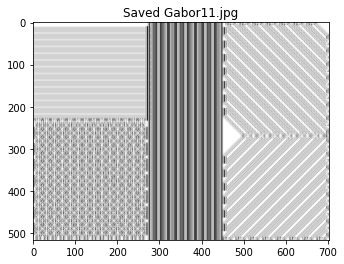

In [26]:
path = '/content/drive/MyDrive/datasets/filtered_responses/Gabor11.jpg'

img2 = cv2.imread(path)
plt.title('Saved Gabor11.jpg')
plt.imshow(img2, cmap = 'jet');